## **Data Processing**

### ***Data Cleaning***

In [ ]:
#Importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#As dataset is already present in Colab's file directly, next we will read the dataset.

df = pd.read_csv('TRAIN.csv')

#for top five values:
df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

That means there are no duplicate values in the dataset to be removed.
Similarly, there is no inconsistency in data.

### ***Feature Engineering***

Extract information such as month, day, and day of the week from the date column.

In [ ]:
# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create time-based features
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek

# Display the first few rows to verify new features
df[['Date', 'month', 'day', 'day_of_week']].head()

,Date,month,day,day_of_week
0,2018-01-01,1,1,0
1,2018-01-01,1,1,0
2,2018-01-01,1,1,0
3,2018-01-01,1,1,0
4,2018-01-01,1,1,0


Create new features by combining existing ones, such as sales per order.

In [ ]:
# Create interaction term: sales per order
df['sales_per_order'] = df['Sales'] / df['#Order']

# Display the first few rows to verify the new feature
df[['Sales', '#Order', 'sales_per_order']].head()

,Sales,#Order,sales_per_order
0,7011.84,9,779.093333
1,51789.12,60,863.152000
2,36868.20,42,877.814286
3,19715.16,23,857.180870
4,45614.52,62,735.718065


Develop features such as total sales in the last week.

In [ ]:
# Sort the data by date
df = df.sort_values(by='Date')

# Create a feature for total sales in the last week
df['sales_last_week'] = df['Sales'].rolling(window=7, min_periods=1).sum()

# Display the first few rows to verify the new feature
df[['Date', 'Sales', 'sales_last_week']].head(10)

,Date,Sales,sales_last_week
0,2018-01-01,7011.84,7011.84
248,2018-01-01,42293.94,49305.78
247,2018-01-01,46070.64,95376.42
246,2018-01-01,26151.12,121527.54
245,2018-01-01,44949.45,166476.99
244,2018-01-01,30395.52,196872.51
243,2018-01-01,57111.12,253983.63
242,2018-01-01,26910.84,273882.63
241,2018-01-01,46580.85,278169.54
249,2018-01-01,18729.36,250828.26


In [ ]:
#Checking for missing values again
df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


Except sales per order, there are no null values in the dataset. So to remove these missing values, we will use the imputation technique.

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for 'sales_per_order' using the mean
imputer = SimpleImputer(strategy='mean')
df['sales_per_order'] = imputer.fit_transform(df[['sales_per_order']])

In [ ]:
df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


### ***Data Transformation***

In this step, we'll scale the numerical features and encode the categorical variables to prepare the data for modeling. We'll use standardization for numerical features and one-hot encoding for categorical variables.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month,day,day_of_week,sales_per_order,sales_last_week
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,0,779.093333,7011.84
248,T1000249,64,S3,L1,R2,2018-01-01,1,Yes,52,42293.94,1,1,0,813.345000,49305.78
247,T1000248,65,S1,L2,R2,2018-01-01,1,Yes,60,46070.64,1,1,0,767.844000,95376.42
246,T1000247,66,S3,L3,R3,2018-01-01,1,Yes,28,26151.12,1,1,0,933.968571,121527.54
245,T1000246,67,S2,L5,R1,2018-01-01,1,Yes,65,44949.45,1,1,0,691.530000,166476.99


In [ ]:
# Define numerical and categorical columns
num_features = ['#Order', 'Sales', 'sales_per_order', 'month', 'day', 'day_of_week', 'sales_last_week']
cat_features = ['Store_Type', 'Region_Code', 'Location_Type']

# Check the first few rows of these features
df[num_features + cat_features].head()

,#Order,Sales,sales_per_order,month,day,day_of_week,sales_last_week,Store_Type,Region_Code,Location_Type
0,9,7011.84,779.093333,1,1,0,7011.84,S1,R1,L3
248,52,42293.94,813.345000,1,1,0,49305.78,S3,R2,L1
247,60,46070.64,767.844000,1,1,0,95376.42,S1,R2,L2
246,28,26151.12,933.968571,1,1,0,121527.54,S3,R3,L3
245,65,44949.45,691.530000,1,1,0,166476.99,S2,R1,L5


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_num_scaled = scaler.fit_transform(df[num_features])

# Convert the scaled data back into a DataFrame
df_num_scaled = pd.DataFrame(df_num_scaled, columns=num_features)

# Display the first few rows of the scaled numerical features
df_num_scaled.head()

,#Order,Sales,sales_per_order,month,day,day_of_week,sales_last_week
0,-1.943251,-1.938189,1.643274,-1.323177,-1.672736,-1.496987,-3.861412
1,-0.531904,-0.026570,2.034853,-1.323177,-1.672736,-1.496987,-3.303023
2,-0.269328,0.178056,1.514667,-1.323177,-1.672736,-1.496987,-2.694772
3,-1.319633,-0.901204,3.413872,-1.323177,-1.672736,-1.496987,-2.349510
4,-0.105217,0.117308,0.642214,-1.323177,-1.672736,-1.496987,-1.756062


In [ ]:
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore', category=FutureWarning)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical features
df_cat_encoded = encoder.fit_transform(df[cat_features])

# Get the feature names after encoding
cat_feature_names = encoder.get_feature_names_out(cat_features)

# Convert the encoded data back into a DataFrame
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=cat_feature_names)

# Display the first few rows of the encoded categorical features
df_cat_encoded.head()

,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Combine the numerical and categorical transformed features into a single DataFrame.

In [ ]:
# Combine the numerical and categorical transformed features
df_transformed = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

# Display the first few rows of the combined DataFrame
df_transformed.head()

,#Order,Sales,sales_per_order,month,day,day_of_week,sales_last_week,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5
0,-1.943251,-1.938189,1.643274,-1.323177,-1.672736,-1.496987,-3.861412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.531904,-0.026570,2.034853,-1.323177,-1.672736,-1.496987,-3.303023,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.269328,0.178056,1.514667,-1.323177,-1.672736,-1.496987,-2.694772,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.319633,-0.901204,3.413872,-1.323177,-1.672736,-1.496987,-2.349510,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.105217,0.117308,0.642214,-1.323177,-1.672736,-1.496987,-1.756062,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### ***Train-Test Split***

Assuming that 'sales' is the target variable we want to predict, we need to separate the features from the target variable.

In [ ]:
# Define the target variable and features
target = 'Sales'
features = df_transformed.columns.difference([target])

X = df_transformed[features]
y = df_transformed[target]

# Display the features and target variable
X.head()

,#Order,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,day,day_of_week,month,sales_last_week,sales_per_order
0,-1.943251,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.672736,-1.496987,-1.323177,-3.861412,1.643274
1,-0.531904,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.672736,-1.496987,-1.323177,-3.303023,2.034853
2,-0.269328,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.672736,-1.496987,-1.323177,-2.694772,1.514667
3,-1.319633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.672736,-1.496987,-1.323177,-2.349510,3.413872
4,-0.105217,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.672736,-1.496987,-1.323177,-1.756062,0.642214


In [ ]:
y.head()

,Sales
0,-1.938189
1,-0.026570
2,0.178056
3,-0.901204
4,0.117308


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 150672
Testing set size: 37668


##**Model Selection**

###***Baseline Model***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'Training set MSE: {mse_train}')
print(f'Testing set MSE: {mse_test}')
print(f'Training set R2: {r2_train}')
print(f'Testing set R2: {r2_test}')

Training set MSE: 0.016070216526092373
Testing set MSE: 0.015980983727953642
Training set R2: 0.9839278650161022
Testing set R2: 0.9840264015243809


**Analysis:**

* *Mean Squared Error (MSE):*

The MSE for both the training and testing sets is very low, indicating that the model's predictions are close to the actual values.

* *R-squared (R²):*

The R² value is very close to 1 for both the training and testing sets, indicating that the model explains nearly all the variability in the data.

**Conclusion:**

The baseline linear regression model performs very well on this dataset, with high R² values and low MSE for both the training and testing sets. This suggests that the model is able to predict the target variable (sales) with high accuracy.

###***Complex Models***

In [ ]:
# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df.sort_values(by='Date', inplace=True)

In [ ]:
print(f"Initial number of rows in dataset: {df.shape[0]}")

Initial number of rows in dataset: 188340


In [ ]:
# Add a small time delta to each duplicate date to make each timestamp unique
df['time_offset'] = df.groupby('Date').cumcount()
df['Date'] = df['Date'] + pd.to_timedelta(df['time_offset'], unit='s')

# Set 'date' as the index
df.set_index('Date', inplace=True)

# Remove the 'time_offset' column
df.drop(columns=['time_offset'], inplace=True)

# Display the first few rows to verify

print(f"Number of rows after handling duplicates: {df.shape[0]}")

Number of rows after handling duplicates: 188340


In [ ]:
# Define a balanced split date for train/test
split_date = '2019-01-01'  # Adjusted split date to ensure sufficient data in both sets

# Split the data
train = df[df.index < split_date]
test = df[df.index >= split_date]

# Display the size of the training and testing sets
print(f'Training set size: {train.shape[0]}')
print(f'Testing set size: {test.shape[0]}')

Training set size: 133225
Testing set size: 55115


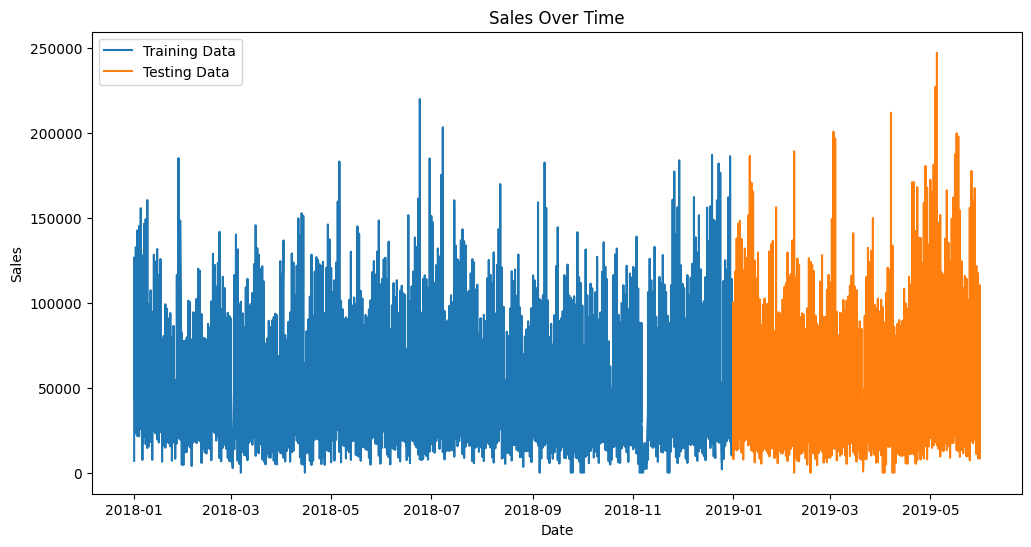

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

<ipython-input-30-187bc5128185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sales_diff'] = train['Sales'].diff()
<ipython-input-30-187bc5128185>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sales_diff'] = train['sales_diff'].diff(7)
<ipython-input-30-187bc5128185>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

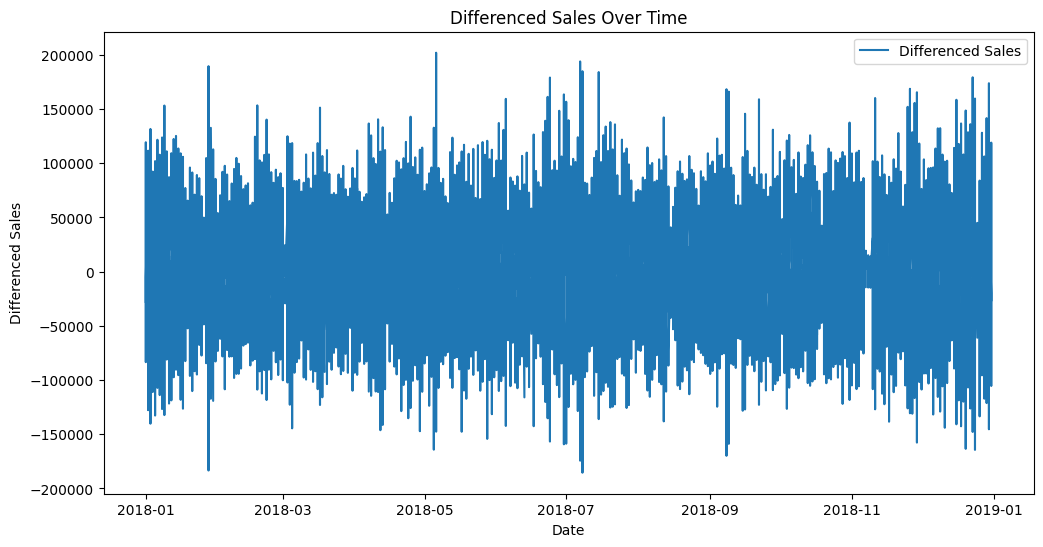

In [ ]:
# First differencing to remove trend
train['sales_diff'] = train['Sales'].diff()

# Seasonal differencing to remove seasonality (using a period of 7 days for weekly seasonality)
train['sales_diff'] = train['sales_diff'].diff(7)

# Drop initial NaN values
train.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['sales_diff'], label='Differenced Sales')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.title('Differenced Sales Over Time')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Use predefined ARIMA parameters (p, d, q)
order = (2, 1, 1)

# Train ARIMA model with hardcoded parameters
arima_model = ARIMA(train['Sales'], order=order)
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.forecast(steps=len(test))

# Ensure the test set and predictions have the same length
test_diff = test['Sales']
arima_predictions = arima_predictions[:len(test_diff)]

# Evaluate the model
mse_arima = mean_squared_error(test_diff, arima_predictions)
print(f'ARIMA Model MSE: {mse_arima}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model MSE: 382660880.1635785


          Actual     Predicted
133217  32729.25  45364.140457
133218  23139.00  45308.835953
133219  43645.20  45227.249093
133220  40367.70  45227.604156
133221  23551.20  45227.797149


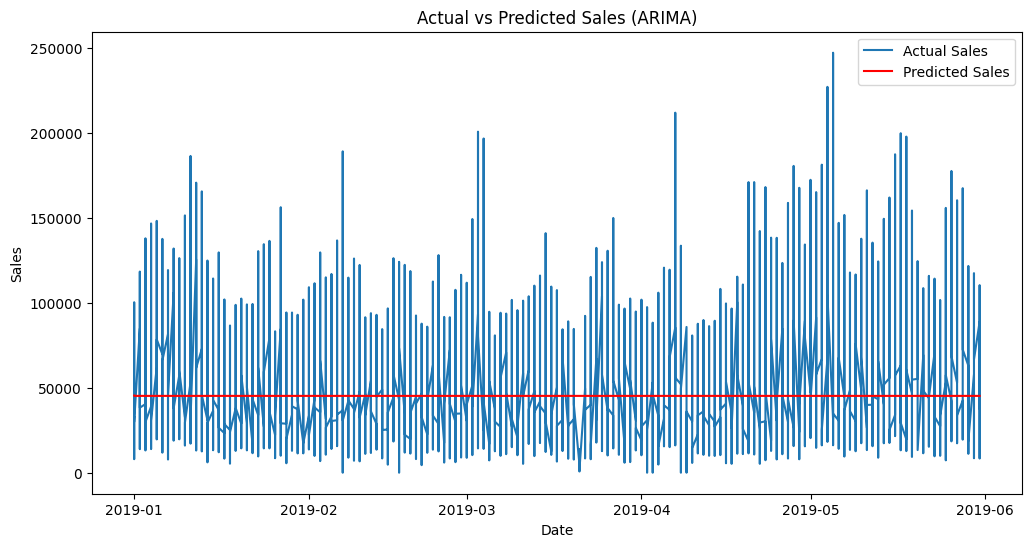

In [ ]:
# Display some predictions vs actuals
pred_vs_actual_arima = pd.DataFrame({'Actual': test_diff.values, 'Predicted': arima_predictions})
print(pred_vs_actual_arima.head())

# Plot the predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(test_diff.index, test_diff, label='Actual Sales')
plt.plot(test_diff.index, arima_predictions, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (ARIMA)')
plt.legend()
plt.show()

The plot shows the actual sales versus the predicted sales from the ARIMA model. The significant discrepancy between the actual sales (blue line) and the predicted sales (red line) indicates that the ARIMA model is not capturing the patterns in the data effectively.